In [ ]:
#Final Project

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [121]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [122]:
houses = train.copy()

In [123]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [124]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [64]:
houses['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

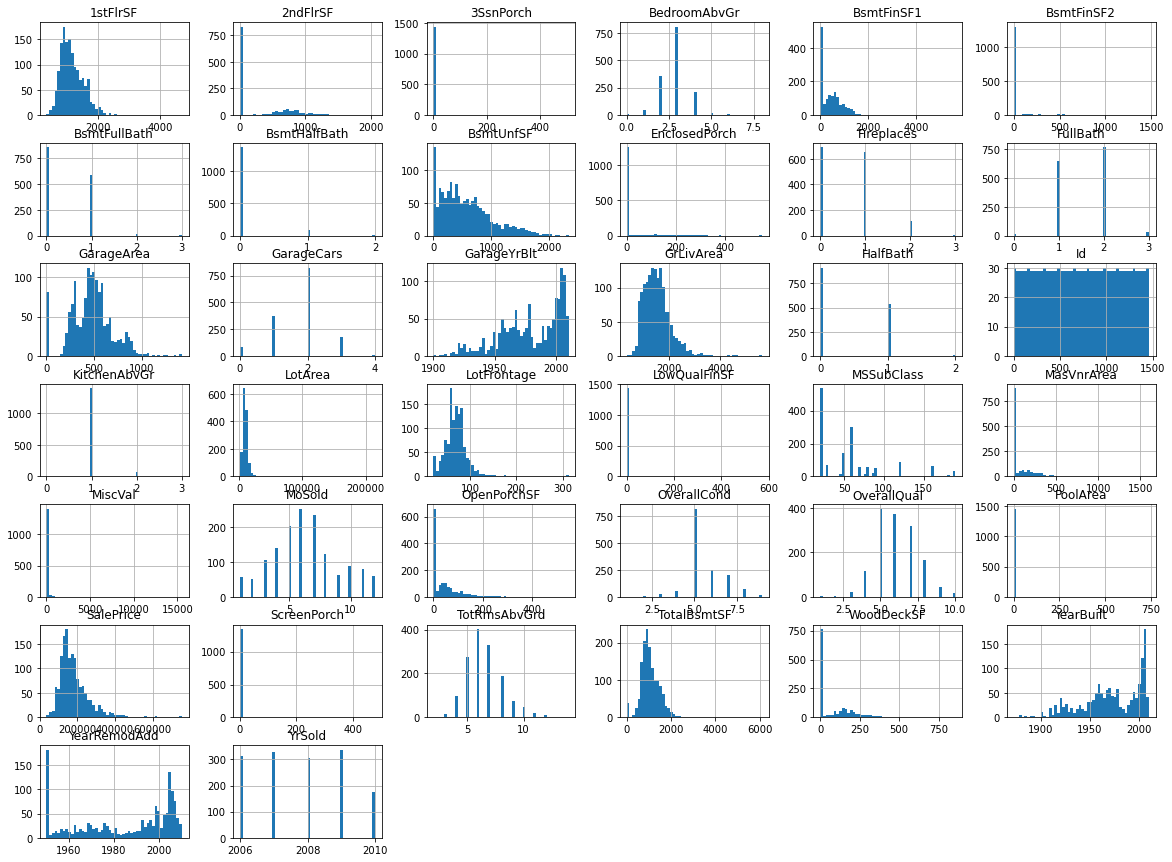

In [66]:
#histogram for numerical attributes
houses.hist(bins=50,figsize=(20,15))
plt.show()

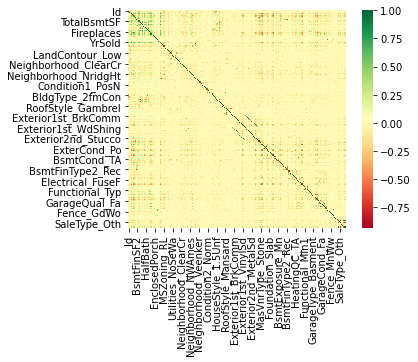

In [48]:
sns.heatmap(train_dummies.corr(),square=True,cmap='RdYlGn')

In [69]:
#correlation matrix
corr_matrix = train_dummies.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
                      ...   
MasVnrType_None    -0.374468
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 247, dtype: float64

In [71]:
#not using currently
train_dummies = pd.get_dummies(train,drop_first=True)
y = train_dummies.drop('SalePrice',axis=1)
X = train_dummies['SalePrice']

In [125]:
#folliwing PDF format- using this one
X = houses.drop('SalePrice',axis=1)
y = houses['SalePrice'].copy()

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
#MiscFeature
X['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [127]:
#Drop Features
X = X.drop('MiscFeature',axis=1)
X = X.drop('Fence',axis=1)
X = X.drop('Alley',axis=1)
X = X.drop('FireplaceQu',axis=1)
X = X.drop('PoolQC',axis=1)

In [83]:
X['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
#Fill NA Values

In [128]:
#Lot Frontage
LotFrontage = X['LotFrontage']
mean = LotFrontage.mean()
X['LotFrontage'].fillna(mean,inplace=True)

In [130]:
#Masonry Veneer Area
MasVnrArea = X['MasVnrArea']
mean = MasVnrArea.mean()
X['MasVnrArea'].fillna(mean,inplace=True)

In [132]:
#Garage Year Built
GarageYrBlt = X['GarageYrBlt']
mean = GarageYrBlt.mean()
X['GarageYrBlt'].fillna(mean,inplace=True)

In [134]:
#Dummies- categorical variables
X_dummies = pd.get_dummies(X,drop_first=True)

In [136]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 233 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(196)
memory usage: 701.6 KB


In [139]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_dummies,y)

LinearRegression()

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil